# Is **SMOKE** & **STROKE** a dirty **JOKE**?: Predicting the Probability of Experiencing a Stroke Using the k-Nearest Neighbor (kNN) Classification Algorithm

People nowadays have either met someone who smokes or smoking themselves (Young People Who Vape Are Much More Likely to Become Smokers, New Research Confirms, 2020),

## Problem

Smoking and vaping are prevalent behaviors in many societies worldwide. Due to public health campaigns and regulations, traditional cigarette smoking has declined in recent years; vaping, on the other hand, has become increasingly popular, especially among young people. A study published in the journal Tobacco Control in 2020 found that young people who used **e-cigarettes (vaping)** were three times more likely to become cigarette smokers within a year than those who did not use e-cigarettes. Smoking is a well-known risk factor for stroke due to the nicotine present in cigarettes, which is also present in e-cigarettes. **Nicotine can cause blood sugar levels to rise**, which is known as hyperglycemia. An increase in blood sugar levels can have several negative effects on the body, including the possibilty of a stroke. Researchers have found that high blood glucose levels can damage the body's organs. Possible long-term effects include damage to large (macrovascular) and small (microvascular) blood vessels, which can lead to stroke.

## Data Discussion

### The `stroke prediction` dataset

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

### Attribute/Feature Information
1) id: unique identifier

2) gender: "Male", "Female" or "Other"


3) age: age of the patient


4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension


5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease


6) ever_married: "No" or "Yes"


7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"


8) Residence_type: "Rural" or "Urban"


9) avg_glucose_level: average glucose level in blood


10) bmi: body mass index


11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*


12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

---
### Importing Libraries & Data Loading

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data (3).csv


In [ ]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['healthcare-dataset-stroke-data.csv']))

from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Highlights

The following highlights were discovered using the kNN algorithm::

1. The optimal no. of neighbors is: <br>
   a. 17 with 95.70% mean test acc. & std of 0.005305. (using all 11 clinical features) <br>
   b. 12 with 95.70% mean test acc. & std of 0.0.006438. (using only Top 3 clinical features)
2. The mean test accuracy is below the required 1.25PCC target accuracy of 114.81%.
3. The features that affect the target most are attributes/features `age` `avg_glucose_level` `bmi`

### Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Treating **null** values


In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

>The `bmi` feature contains 201 **null** values

In [ ]:
df.isnull().sum().sum()

201

>Removing/dropping rows that contains **null** values using dropna() function

In [ ]:
df = df.dropna()
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


---
### Converting String values into discrete values

In [ ]:
a = {'Female': 0, 'Male': 1}
b = {'Yes': 0, 'No': 1}
c = {'Private': 0, 'Self-employed': 1, 'children': 2, 'Govt_job': 3, 'Never_worked': 3}
d = {'Urban': 0, 'Rural': 1}
e = {'never smoked': 0, 'formerly smoked': 1, 'smokes': 2, 'Unknown': 3}

df['gender'] = df['gender'].map(a)
df['ever_married'] = df['ever_married'].map(b)
df['work_type'] = df['work_type'].map(c)
df['Residence_type'] = df['Residence_type'].map(d)
df['smoking_status'] = df['smoking_status'].map(e)

In [ ]:
df = df.drop(['id'],axis=1)
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   float64
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   int64  
 5   work_type          4908 non-null   int64  
 6   Residence_type     4908 non-null   int64  
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   int64  
 10  stroke             4908 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 460.1 KB


---
## Knn Classifier Implementation

>Features/Independent Variables include `gender`, `age`, `hypertension`,	`heart_disease`,	`ever_married`,	`work_type`,	`Residence_type`,	`avg_glucose_level`,	`bmi`, and	`smoking_status`

>Target/Dependent Variable is `stroke`

In [ ]:
X = df.drop(['stroke'],axis=1)
y = df['stroke']
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0,1,0,0,0,228.69,36.6,1,1
2,1.0,80.0,0,1,0,0,1,105.92,32.5,0,1
3,0.0,49.0,0,0,0,0,0,171.23,34.4,2,1
4,0.0,79.0,1,0,0,1,1,174.12,24.0,0,1
5,1.0,81.0,0,0,0,0,0,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0.0,13.0,0,0,1,2,1,103.08,18.6,3,0
5106,0.0,81.0,0,0,0,1,0,125.20,40.0,0,0
5107,0.0,35.0,0,0,0,1,1,82.99,30.6,0,0
5108,1.0,51.0,0,0,0,0,1,166.29,25.6,1,0


### Finding the optimal number of neighbors
Using `random_state=i` & `n_trials` to perform 50 trials and `n_neighbors` & `neighbors_values` to perform neighbors=1 until neighbors=40 and display each accuracy

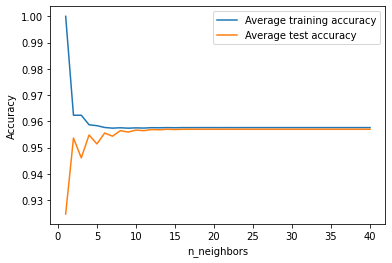

In [ ]:
from sklearn.model_selection import train_test_split

ave_train_accuracy = []
ave_test_accuracy = []

n_trials = range(33,83)
neighbors_values = range(1, 41)

for n_neighbors in neighbors_values:
    train_accuracy = []
    test_accuracy = []
    for i in n_trials:
        X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.30,random_state=i)
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)
        clf.fit(X_train, y_train)
        train_accuracy.append(clf.score(X_train, y_train))
        test_accuracy.append(clf.score(X_test, y_test))
    ave_train_accuracy.append(np.mean(train_accuracy))
    ave_test_accuracy.append(np.mean(test_accuracy))

plt.plot(neighbors_values, ave_train_accuracy, label="Average training accuracy")
plt.plot(neighbors_values, ave_test_accuracy, label="Average test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

>Mean plot of accuracy vs n_neighbors from n=1 until n=40

In [ ]:
mean_test_accuracy = np.mean(ave_test_accuracy)
print(f"Mean test accuracy:{mean_test_accuracy:.4}")
sd = np.std(ave_test_accuracy)
print(f"Standard Deviation:{sd:.4}")

Mean test accuracy:0.9554
Standard Deviation:0.005305


In [ ]:
difference =  np.array(ave_train_accuracy)-np.array(ave_test_accuracy)
Min = min(difference)
Minindex = np.argmin(difference)
train_acc = ave_train_accuracy[Minindex]
test_acc = ave_test_accuracy[Minindex]
print(f"The optimal n_neighbors would be {Minindex + 1}, as it has the lowest distance difference with the value of {Min}.")
print(f"\nWhilst maintaining an accuracy of training={train_acc} test={test_acc}")

The optimal n_neighbors would be 17, as it has the lowest distance difference with the value of 0.0006231764186210853.

Whilst maintaining an accuracy of training=0.9575953420669578 test=0.9569721656483368


---
### Calculation of Pcc

Population per class:       0
1   209
0  4699

1.25 * Proportion Chance Criterion: 114.80745513703158%


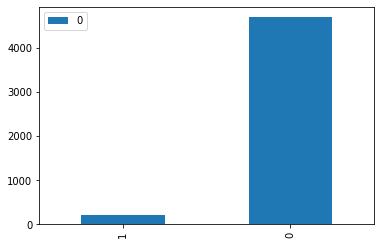

In [ ]:
from collections import Counter
state_counts = Counter(df['stroke'])
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.plot(kind='bar')

#calculate PCC
num=(df_state[0]/df_state[0].sum())**2
print("Population per class: {}\n".format(df_state))
print("1.25 * Proportion Chance Criterion: {}%".format(1.25*100*num.sum()))


---
### Finding the Top 3 Features

In [ ]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier()
Top3=[]

number_features = X.shape[1]
array = X.values
print('Feature  Accuracy')
for i in range(number_features):
    X = array[:, i].reshape(-1, 1)
    scores = cross_val_score(clf, X, y)
    print('%d        %g' % (i, scores.mean()))
    Top3.append(scores.mean())
T3 = sorted(Top3, reverse=True)[:3]
indices = [i for i, x in enumerate(Top3) if x in T3]
print(f"The top 3 Features are:{indices}")

Feature  Accuracy
0        0.0425834
1        0.779949
2        0.0425834
3        0.0425834
4        0.0425834
5        0.178894
6        0.0425834
7        0.956805
8        0.930113
9        0.0425834
The top 3 Features are:[1, 7, 8]


>`age` `avg_glucose_level` `bmi` are the top 3 features with the highest relevance score.

### Optimizing the model using only the TOP 3 Features:`age` `avg_glucose_level` `bmi`

>Features/Independent Variables include `age`, `avg_glucose_level`,	and `bmi`

>Target/Dependent Variable is `stroke`

In [ ]:
X = df.drop(['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status','stroke'],axis=1)
y = df['stroke']

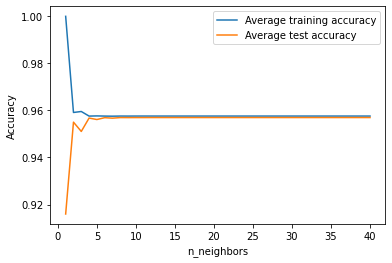

In [ ]:
ave_train_accuracy = []
ave_test_accuracy = []

n_trials = range(33,83)
neighbors_values = range(1, 41)

for n_neighbors in neighbors_values:
    train_accuracy = []
    test_accuracy = []
    for i in n_trials:
        X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.30,random_state=i)
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)
        clf.fit(X_train, y_train)
        train_accuracy.append(clf.score(X_train, y_train))
        test_accuracy.append(clf.score(X_test, y_test))
    ave_train_accuracy.append(np.mean(train_accuracy))
    ave_test_accuracy.append(np.mean(test_accuracy))

plt.plot(neighbors_values, ave_train_accuracy, label="Average training accuracy")
plt.plot(neighbors_values, ave_test_accuracy, label="Average test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [ ]:
mean_test_accuracy = np.mean(ave_test_accuracy)
print(f"Mean test accuracy:{mean_test_accuracy:.4}")
sd = np.std(ave_test_accuracy)
print(f"Standard Deviation:{sd:.4}")

Mean test accuracy:0.9557
Standard Deviation:0.006438


In [ ]:
difference =  np.array(ave_train_accuracy)-np.array(ave_test_accuracy)
Min = min(difference)
Minindex = np.argmin(difference)
train_acc = ave_train_accuracy[Minindex]
test_acc = ave_test_accuracy[Minindex]
print(f"The optimal n_neighbors would be {Minindex + 1}, as it has the lowest distance difference with the value of {Min}.")
print(f"\nWhilst maintaining an accuracy of training={train_acc} test={test_acc}")

The optimal n_neighbors would be 12, as it has the lowest distance difference with the value of 0.0006348212512264917.

Whilst maintaining an accuracy of training=0.9576069868995633 test=0.9569721656483368


## Discussion of Results

|test optimal neighbors<br> (all 11)|test optimal neighbors <br> (top 3)
|:-----|:-----------|
|n=17|n=12|

>This indicates that using all 11 clinical features necessitates more neighbors (n=17) than using only the top three clinical features (n=12). This suggests that having more features to consider involves having more neighbors to accurately determine/classify a new instance.

|test accuracy<br> (all 11)|test accuracy <br> (top 3)|PCC|
|:----|:-----------|:--|
|95.70%|95.70%|114.81%|

>By using only the top 3 clinical features it performed better by 0.0000116 or .00116%

>The results above show that there is no significant difference when using all 11 clinical features & using only 3 clinical features. Hence, regardless of whether the model uses the other eight clinical features in addition to the top three clinical features, the model will perform the same on classifying whether you are likely to have a stroke or not.

>By only using the top 3 features of our dataset it shows that indeed those said features are the most influencial among the 11 features, hence `age` `avg_glucose_level` `bmi` highly influences the probability of someone's vulnerability to stroke.

>It is also worth noting that the classifier does not outperform random chance prediction because both test accuracy of 95.70% (using all 11 & top 3 clinical features) is below the required 1.25PCC target accuracy of 114.81%.

Credits to the author of this dataset: FEDESORIANO https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset